In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhirampp","key":"c13e30591134476f3e2f36be193d8514"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                             9MB  2023-03-20 15:43:25           1612         61  1.0              
dgoenrique/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                     2MB  2023-03-13 18:49:00           1130         35  1.0              
rajkumarpandey02/list-of-countries-by-gdp-sector-composition  List of Countries by GDP Sector Composition     8KB  2023-03-20 04:42:10           1164         42  1.0              
datascientistanna/customers-dataset                           Shop Customer Data                    

In [7]:
! kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:04<00:00, 212MB/s]
100% 812M/812M [00:04<00:00, 178MB/s]


In [8]:
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [9]:
import numpy as np
import pandas as pd
import zipfile
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D , Dropout, Flatten, Dense, Activation, GlobalMaxPooling2D
from keras.applications import VGG16
from keras import optimizers
from keras.models import Model
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings 
warnings.filterwarnings('ignore')

In [10]:
import tensorflow
tensorflow.keras.applications.ResNet50

<function keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, **kwargs)>

In [11]:
TEST_SIZE = 0.5
RANDOM_STATE = 2018
BATCH_SIZE = 64
NO_EPOCHS = 20
NUM_CLASSES = 2
SAMPLE_SIZE = 20000
PATH = '/content/Dog-Cat'
TRAIN_FOLDER = './train/'
TEST_FOLDER =  './test/'
IMG_SIZE = 224
RESNET_WEIGHTS_PATH = '/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [12]:
train_image_path = os.path.join(PATH, "train.zip")
test_image_path = os.path.join(PATH, "test1.zip")

In [13]:
import zipfile as zip1
with zip1.ZipFile(train_image_path,"r") as z:
    z.extractall(".")
  

In [14]:
with zip1.ZipFile(test_image_path,"r") as z:
    z.extractall(".")


In [18]:
train_image_list = os.listdir("/content/Dog-Cat/train")[0:SAMPLE_SIZE]
test_image_list = os.listdir("/content/Dog-Cat/test1")

In [19]:
filenames = train_image_list
categories=[]

for filename in filenames:
    category = filename.split('.')[0]
    
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
})

df.head()

,filename,category
0,cat.10032.jpg,0
1,cat.9711.jpg,0
2,cat.5338.jpg,0
3,cat.4650.jpg,0
4,cat.246.jpg,0


In [20]:
df.dtypes

filename    object
category     int64
dtype: object

<Axes: >

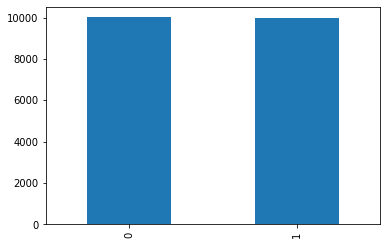

In [21]:

df['category'].value_counts().plot.bar()

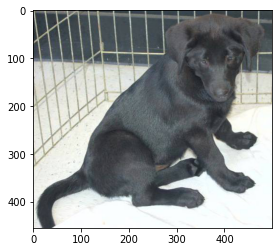

In [22]:
sample =random.choice(filenames)
img = np.asarray(Image.open("/content/Dog-Cat/train/"+sample))
# image = load_img()
plt.imshow(img)

In [23]:
train_df, validate_df = train_test_split(df, test_size=0.2)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

In [24]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [25]:
validate_df

,index,filename,category
0,9531,cat.10891.jpg,0
1,5885,cat.5935.jpg,0
2,11756,cat.9455.jpg,0
3,6669,cat.3660.jpg,0
4,4766,cat.6849.jpg,0
...,...,...,...
3995,16681,dog.11542.jpg,1
3996,2940,cat.3542.jpg,0
3997,19513,cat.4278.jpg,0
3998,913,dog.1028.jpg,1


In [26]:
train_df['category']=train_df['category'].astype(str)
validate_df['category']=validate_df['category'].astype(str)

In [27]:
image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 10
batch_size = 16

In [28]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/Dog-Cat/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 16000 validated image filenames belonging to 2 classes.


In [29]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/Dog-Cat/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 4000 validated image filenames belonging to 2 classes.


In [30]:
print(validation_generator.class_indices)
print(validation_generator.n)
print(len(validation_generator))

{'0': 0, '1': 1}
4000
250


Found 1 validated image filenames belonging to 1 classes.


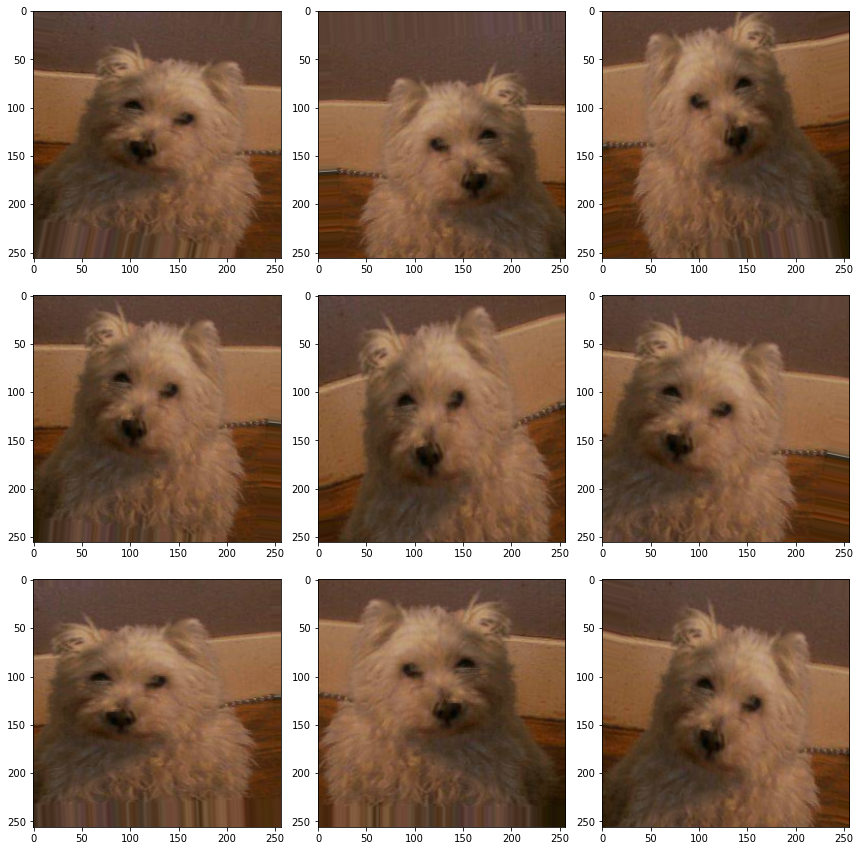

In [31]:
example_df = train_df.sample(n=1).reset_index(drop = True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/content/Dog-Cat/train/",
    x_col='filename',
    y_col='category',
    class_mode='categorical'
)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [32]:
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [33]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/10
1000/1000 [==============================] - 275s 263ms/step - loss: 0.3321 - accuracy: 0.8424 - val_loss: 0.1570 - val_accuracy: 0.9355
Epoch 2/10
1000/1000 [==============================] - 265s 265ms/step - loss: 0.1764 - accuracy: 0.9243 - val_loss: 0.1242 - val_accuracy: 0.9505
Epoch 3/10
1000/1000 [==============================] - 263s 263ms/step - loss: 0.1429 - accuracy: 0.9432 - val_loss: 0.1085 - val_accuracy: 0.9567
Epoch 4/10
1000/1000 [==============================] - 262s 262ms/step - loss: 0.1245 - accuracy: 0.9503 - val_loss: 0.0998 - val_accuracy: 0.9607
Epoch 5/10
1000/1000 [==============================] - 264s 264ms/step - loss: 0.1150 - accuracy: 0.9539 - val_loss: 0.1029 - val_accuracy: 0.9615
Epoch 6/10
1000/1000 [==============================] - 260s 260ms/step - loss: 0.1050 - accuracy: 0.9591 - val_loss: 0.0877 - val_accuracy: 0.9650
Epoch 7/10
1000/1000 [==============================] - 265s 265ms/step - loss: 0.0965 - accuracy: 0.9610 - val_

In [34]:
loss, accuracy = model.evaluate(train_generator, verbose=1)
print("Train : accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss_v, accuracy_v = model.evaluate(validation_generator, verbose=1)
print("Validation : accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))

model.save("finalmodel.h5")

1000/1000 [==============================] - 237s 237ms/step - loss: 0.0673 - accuracy: 0.9732
Train : accuracy = 0.973250  ;  loss = 0.067273
250/250 [==============================] - 19s 75ms/step - loss: 0.0828 - accuracy: 0.9700
Validation : accuracy = 0.970000  ;  loss_v = 0.082764


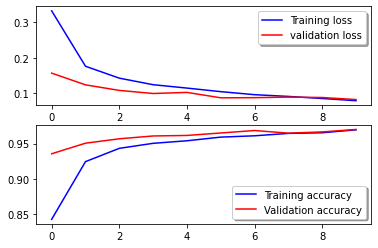

In [36]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [37]:
test_filenames = os.listdir("/content/Dog-Cat/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [38]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/Dog-Cat/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 12500 validated image filenames.


In [39]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

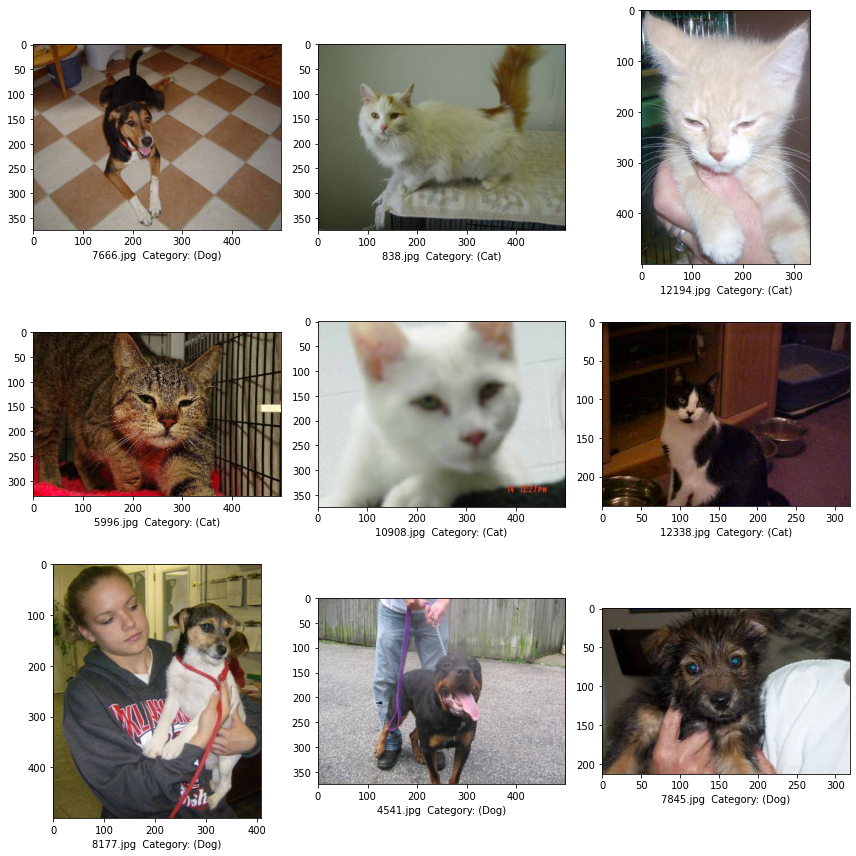

In [42]:
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = 'Cat'if row['category']==0 else 'Dog'
    img = np.asarray(Image.open("/content/Dog-Cat/test1/"+filename))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '  Category: (' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()